# Regresión Lineal con Stats

In [1]:
c = lambda f: 5/9*(f-32)

In [2]:
c(100)

37.77777777777778

In [3]:
temperaturas = [(f,c(f)) for f in range(0,101,10)]

In [4]:
temperaturas

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

In [5]:
#Temperaturas es una lista de tuplas con dos elementos cada una
#Se separaron facilmente en el dataframe por columna 
import pandas as pd
temp_df = pd.DataFrame(temperaturas,columns=["Faren","Celcius"])

In [6]:
temp_df

,Faren,Celcius
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


Text(0, 0.5, 'Celsius')

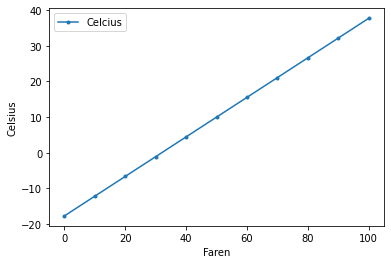

In [12]:
axes = temp_df.plot(x="Faren",y="Celcius",style=".-")
axes.set_ylabel("Celsius")

* La Relación por ejemplo es perfectamente linal. 
* Y = M*X + B

# Ejemplo REAL - KING COUNTY

In [13]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")

In [16]:
df.head(10)

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


In [17]:
df.tail()

,sqft,price
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


In [18]:
df.columns = ["area","precio"]

In [19]:
df.head()

,area,precio
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


<AxesSubplot:xlabel='area', ylabel='precio'>

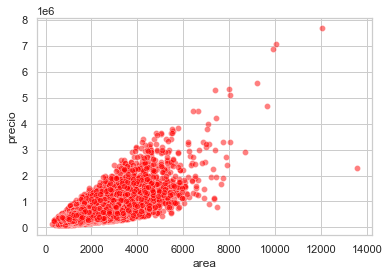

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
sns.scatterplot(data = df,x="area",y="precio",alpha=0.5,color="red")

In [29]:
from scipy import stats

In [30]:
modelo = stats.linregress(x=df["area"],y=df["precio"])

In [31]:
modelo

LinregressResult(slope=280.8066899295009, intercept=-43867.60153385613, rvalue=0.7020437212325276, pvalue=0.0, stderr=1.9376149902337922, intercept_stderr=4405.45544328903)

In [32]:
#La Pendiente de nuestra recta
modelo.slope

280.8066899295009

In [33]:
#La intersecion en el eje Y 
modelo.intercept

-43867.60153385613

In [35]:
df.head(10)

,area,precio
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


In [34]:
#Predizcamos el precio de una casa. 
modelo.slope * 1890 + modelo.intercept

486857.04243290063

In [36]:
#Predecimos de nuevo. 
modelo.slope * 1180 + modelo.intercept

287484.292582955

# Lo Graficamos 

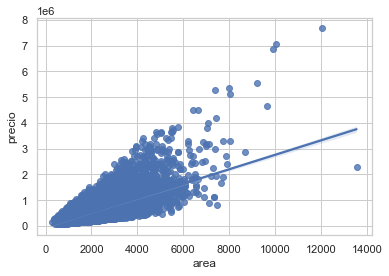

In [37]:
axes = sns.regplot(x=df["area"],y=df["precio"])